In [166]:
import os
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=12)

In [167]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

In [213]:
rjstlf = pd.read_csv('data/건실기업.csv')
qneh = pd.read_csv('data/부실기업.csv')

In [220]:
# 라벨링
rjstlf['target'] = 0
qneh['target'] = 1

In [227]:
# 부도기업과 건실기업 합치기
merge = pd.concat([qneh, rjstlf])

In [229]:
# 인덱스 초기화
merge.reset_index(inplace=True, drop=True)

In [230]:
merge

,company,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,전기자산총계,전기자본총계,매출원가,매출총이익,법인세비용차감전순이익(손실),당기순이익(손실),판매비와관리비,target
0,금강제강,6.127969e+10,1.942067e+11,3.911075e+10,4.972530e+10,1.329270e+11,1.139850e+11,1.009693e+11,3.743670e+10,1.794819e+11,7.221150e+10,1.681825e+11,5.919071e+08,-1.350944e+10,-1.126087e+10,7.841895e+09,1
1,금강제강,7.221150e+10,1.794819e+11,4.107451e+10,6.117835e+10,1.072704e+11,8.530256e+10,9.980691e+10,3.334325e+10,1.201414e+11,5.524806e+10,1.220133e+11,1.344448e+10,2.073006e+09,1.519307e+09,9.770100e+09,1
2,배명금속,9.529646e+10,2.086196e+11,2.636713e+10,3.016644e+10,1.133231e+11,1.069848e+11,1.205597e+11,6.661848e+10,1.793991e+11,7.774548e+10,7.305672e+10,8.510337e+09,3.762406e+08,6.277812e+08,5.065406e+09,1
3,배명금속,7.774548e+10,1.793991e+11,1.853608e+10,2.611897e+10,1.016536e+11,9.504927e+10,9.431595e+10,5.521840e+10,1.711714e+11,8.261022e+10,9.462505e+10,7.700935e+09,-5.482425e+09,-5.245282e+09,9.233610e+09,1
4,풍림산업,1.528374e+11,1.374256e+12,5.168464e+11,7.592653e+11,1.221419e+12,7.529557e+11,9.197183e+11,3.000229e+10,1.188801e+12,1.851492e+11,1.038061e+12,2.072701e+09,-4.136635e+10,-3.585256e+10,4.386715e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,아바코,1.192145e+11,2.127937e+11,4.229716e+10,4.447009e+10,9.357926e+10,9.048482e+10,1.725966e+11,1.067458e+11,1.863160e+11,1.041451e+11,2.062204e+11,3.726460e+10,3.137310e+10,2.552277e+10,1.439728e+10,0
70,와이엔텍,1.347631e+11,2.428635e+11,3.338101e+09,8.865239e+09,1.081004e+11,5.861755e+10,3.311899e+10,1.117301e+08,2.091321e+11,1.165818e+11,6.931581e+10,2.930489e+10,2.417802e+10,1.842486e+10,3.147194e+09,0
71,와이엔텍,1.165818e+11,2.091321e+11,2.759757e+09,7.026043e+09,9.255027e+10,4.161611e+10,2.212249e+10,9.665501e+07,1.882713e+11,1.075542e+11,5.845698e+10,1.761398e+10,1.209514e+10,9.033205e+09,2.679668e+09,0
72,원익IPS,5.665541e+11,8.991617e+11,8.567200e+10,1.270617e+11,3.326075e+11,3.270475e+11,5.529748e+11,3.222038e+11,5.123460e+11,3.692165e+11,3.901748e+11,2.790668e+11,4.346115e+10,4.286267e+10,1.283791e+11,0


In [342]:
# 회사이름으로 묶어서 평균내기
result = merge.groupby(by=merge['company']).mean()

In [343]:
result.head()

,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,전기자산총계,전기자본총계,...,자산총계순이익률,매출액 법인세 비용 차감 전 순 이익률,자산총계 법인세 비용 차감 전 순 이익률,매출액 순이익률,자기자본 순이익률,재고자산 회전율,자산총계 회전율,매입채무 회전율,유동비율,부채비율
company,,,,,,,,,,,,,,,,,,,,,
A,1.068713e+11,4.411212e+11,2.447476e+11,5.297392e+11,5.851678e+11,5.536376e+11,5.020090e+11,6.506237e+10,7.531397e+11,1.542247e+11,...,-0.069493,-0.076435,-0.031466,-0.117491,-0.221261,3.800585,0.578351,0.961335,0.941096,4.983090
B,1.259146e+11,4.518570e+11,3.064559e+11,3.890551e+11,7.427055e+11,2.399093e+11,2.704202e+11,4.407495e+10,1.743602e+11,1.165504e+11,...,-0.129923,-0.322969,-0.097767,-0.281228,-0.335857,5.610081,0.464520,0.619641,1.371238,6.091302
C,1.055735e+11,7.809624e+11,2.916006e+11,1.966291e+11,7.973145e+11,5.739469e+11,4.884723e+11,4.590434e+10,1.233988e+12,1.830039e+11,...,-0.023760,-0.099415,-0.017256,-0.115442,-0.168951,10.125841,0.425737,2.064652,1.037655,7.518369
D,1.001223e+11,8.595038e+11,4.080315e+11,4.719270e+11,8.147011e+11,5.840948e+11,5.394634e+11,4.536345e+10,7.725810e+11,1.104453e+11,...,-0.063800,-0.239828,-0.085101,-0.194224,-0.514955,6.318206,0.330345,0.691036,1.067761,7.746922
E,1.294079e+11,4.403563e+11,1.655942e+11,3.143097e+11,6.418250e+11,5.734766e+11,5.387988e+11,5.986034e+10,9.231308e+11,2.408598e+11,...,-0.020978,-0.127259,-0.120263,-0.018790,-0.093143,11.462428,1.742215,5.475129,1.147893,5.018794


In [108]:
result = pd.read_csv('test.csv')

In [333]:
features.isna().sum()

총자산증가율                    0
매출액증가율                    0
자기자본비율                    0
자산총계순이익률                  0
매출액 법인세 비용 차감 전 순 이익률     0
자산총계 법인세 비용 차감 전 순 이익률    0
매출액 순이익률                  0
자기자본 순이익률                 0
재고자산 회전율                  0
자산총계 회전율                  0
매입채무 회전율                  0
유동비율                      0
부채비율                      0
dtype: int64

### 랜덤포레스트,CROSSVAL_VAL_SCORE

In [177]:
# 랜덤포레스트
rf_clf = RandomForestClassifier(random_state=2020)

In [179]:
# 분리
label = merge.iloc[:, -1]
features = merge.iloc[:, 1:-1]

In [186]:
# cross_val_score
score_list = cross_val_score(rf_clf, features, label, cv=5)

In [187]:
# 스코어 계산
a = list(map(lambda x: '{score:.2f}'.format(score=x), score_list))

In [188]:
a

['0.76', '1.00', '1.00', '1.00', '0.94']

In [346]:
# 데이터 원본 복사
result2 = result

In [347]:
# 인덱스 초기화
result2.reset_index(inplace=True)

In [348]:
result2.iloc[:, 1:]

,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,전기자산총계,전기자본총계,...,자산총계순이익률,매출액 법인세 비용 차감 전 순 이익률,자산총계 법인세 비용 차감 전 순 이익률,매출액 순이익률,자기자본 순이익률,재고자산 회전율,자산총계 회전율,매입채무 회전율,유동비율,부채비율
0,1.068713e+11,4.411212e+11,2.447476e+11,5.297392e+11,5.851678e+11,5.536376e+11,5.020090e+11,6.506237e+10,7.531397e+11,1.542247e+11,...,-0.069493,-0.076435,-0.031466,-0.117491,-0.221261,3.800585,0.578351,0.961335,0.941096,4.983090
1,1.259146e+11,4.518570e+11,3.064559e+11,3.890551e+11,7.427055e+11,2.399093e+11,2.704202e+11,4.407495e+10,1.743602e+11,1.165504e+11,...,-0.129923,-0.322969,-0.097767,-0.281228,-0.335857,5.610081,0.464520,0.619641,1.371238,6.091302
2,1.055735e+11,7.809624e+11,2.916006e+11,1.966291e+11,7.973145e+11,5.739469e+11,4.884723e+11,4.590434e+10,1.233988e+12,1.830039e+11,...,-0.023760,-0.099415,-0.017256,-0.115442,-0.168951,10.125841,0.425737,2.064652,1.037655,7.518369
3,1.001223e+11,8.595038e+11,4.080315e+11,4.719270e+11,8.147011e+11,5.840948e+11,5.394634e+11,4.536345e+10,7.725810e+11,1.104453e+11,...,-0.063800,-0.239828,-0.085101,-0.194224,-0.514955,6.318206,0.330345,0.691036,1.067761,7.746922
4,1.294079e+11,4.403563e+11,1.655942e+11,3.143097e+11,6.418250e+11,5.734766e+11,5.387988e+11,5.986034e+10,9.231308e+11,2.408598e+11,...,-0.020978,-0.127259,-0.120263,-0.018790,-0.093143,11.462428,1.742215,5.475129,1.147893,5.018794
5,1.127119e+11,7.623990e+11,2.011612e+11,1.410683e+11,6.520361e+11,6.938341e+11,2.940544e+11,5.569771e+10,4.522778e+11,1.652982e+11,...,-0.054288,-0.130782,-0.077051,-0.102784,-0.247329,6.173621,0.458368,3.185443,0.495912,8.318417
6,1.145998e+11,7.720536e+11,4.082741e+11,2.778436e+11,6.012771e+11,4.013805e+11,4.977231e+11,5.447538e+10,7.138373e+11,1.451326e+11,...,-0.064646,-0.049779,-0.070013,-0.046973,-0.510714,18.559506,1.410545,2.506261,1.641131,6.919578
7,1.661228e+11,6.836841e+11,3.443945e+11,6.149637e+11,1.036341e+12,9.236947e+11,4.796192e+11,4.555733e+10,3.660274e+11,9.448978e+10,...,-0.009151,-0.038176,-0.026077,-0.006335,-0.044568,11.925508,0.794960,2.384380,0.521308,6.242379
8,1.370437e+11,3.854504e+11,3.075979e+11,3.235256e+11,4.717380e+11,8.891675e+11,6.672049e+11,5.719435e+10,4.022492e+11,1.626600e+11,...,-0.155458,-0.070461,-0.127896,-0.094019,-0.408585,12.008352,1.931289,2.231058,0.751553,3.220932
9,1.154186e+11,4.784535e+11,2.929486e+11,5.336789e+11,5.352120e+11,3.969263e+11,1.894792e+11,5.105685e+10,7.809322e+11,1.561738e+11,...,-0.050100,-0.081824,-0.092870,-0.040963,-0.216608,13.517814,1.526884,2.656967,0.446037,4.789565


### 코사인 유사도

In [349]:
similarity = cosine_similarity(result2.iloc[:,1:])

In [350]:
similarity.shape

(37, 37)

In [351]:
a = pd.DataFrame(similarity, index = result2['company'] , columns=result2['company'])
a.index.name = ''
a.columns.name =''

In [352]:
a.head()

,A,B,C,D,E,F,G,H,I,J,...,금강제강,메디톡스,명성티엔에스,미코,배명금속,슈펙스비앤피,아바코,와이엔텍,원익IPS,풍림산업
,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.867833,0.943714,0.967641,0.948850,0.896820,0.868285,0.914218,0.890001,0.926241,...,0.898247,0.763231,0.823291,0.811188,0.881577,0.848319,0.806116,0.744524,0.757216,0.950628
B,0.867833,1.000000,0.803992,0.920297,0.800619,0.874964,0.819894,0.939435,0.790089,0.829021,...,0.833592,0.650029,0.726539,0.765922,0.777412,0.795754,0.692920,0.668158,0.687095,0.880675
C,0.943714,0.803992,1.000000,0.954600,0.947520,0.914983,0.887095,0.836878,0.814580,0.905267,...,0.920145,0.833628,0.878869,0.882567,0.928126,0.941983,0.839848,0.852288,0.792530,0.943455
D,0.967641,0.920297,0.954600,1.000000,0.918139,0.951167,0.899024,0.931563,0.865830,0.909317,...,0.926763,0.785306,0.852043,0.863858,0.906477,0.912059,0.809982,0.792395,0.784344,0.969034
E,0.948850,0.800619,0.947520,0.918139,1.000000,0.894062,0.942064,0.879381,0.915352,0.953725,...,0.943139,0.763721,0.859660,0.833960,0.904902,0.858089,0.879535,0.779904,0.800867,0.966155


In [353]:
# 데이터 프레임 저장
a.to_csv('data/cosine_similarity.csv', index=False)

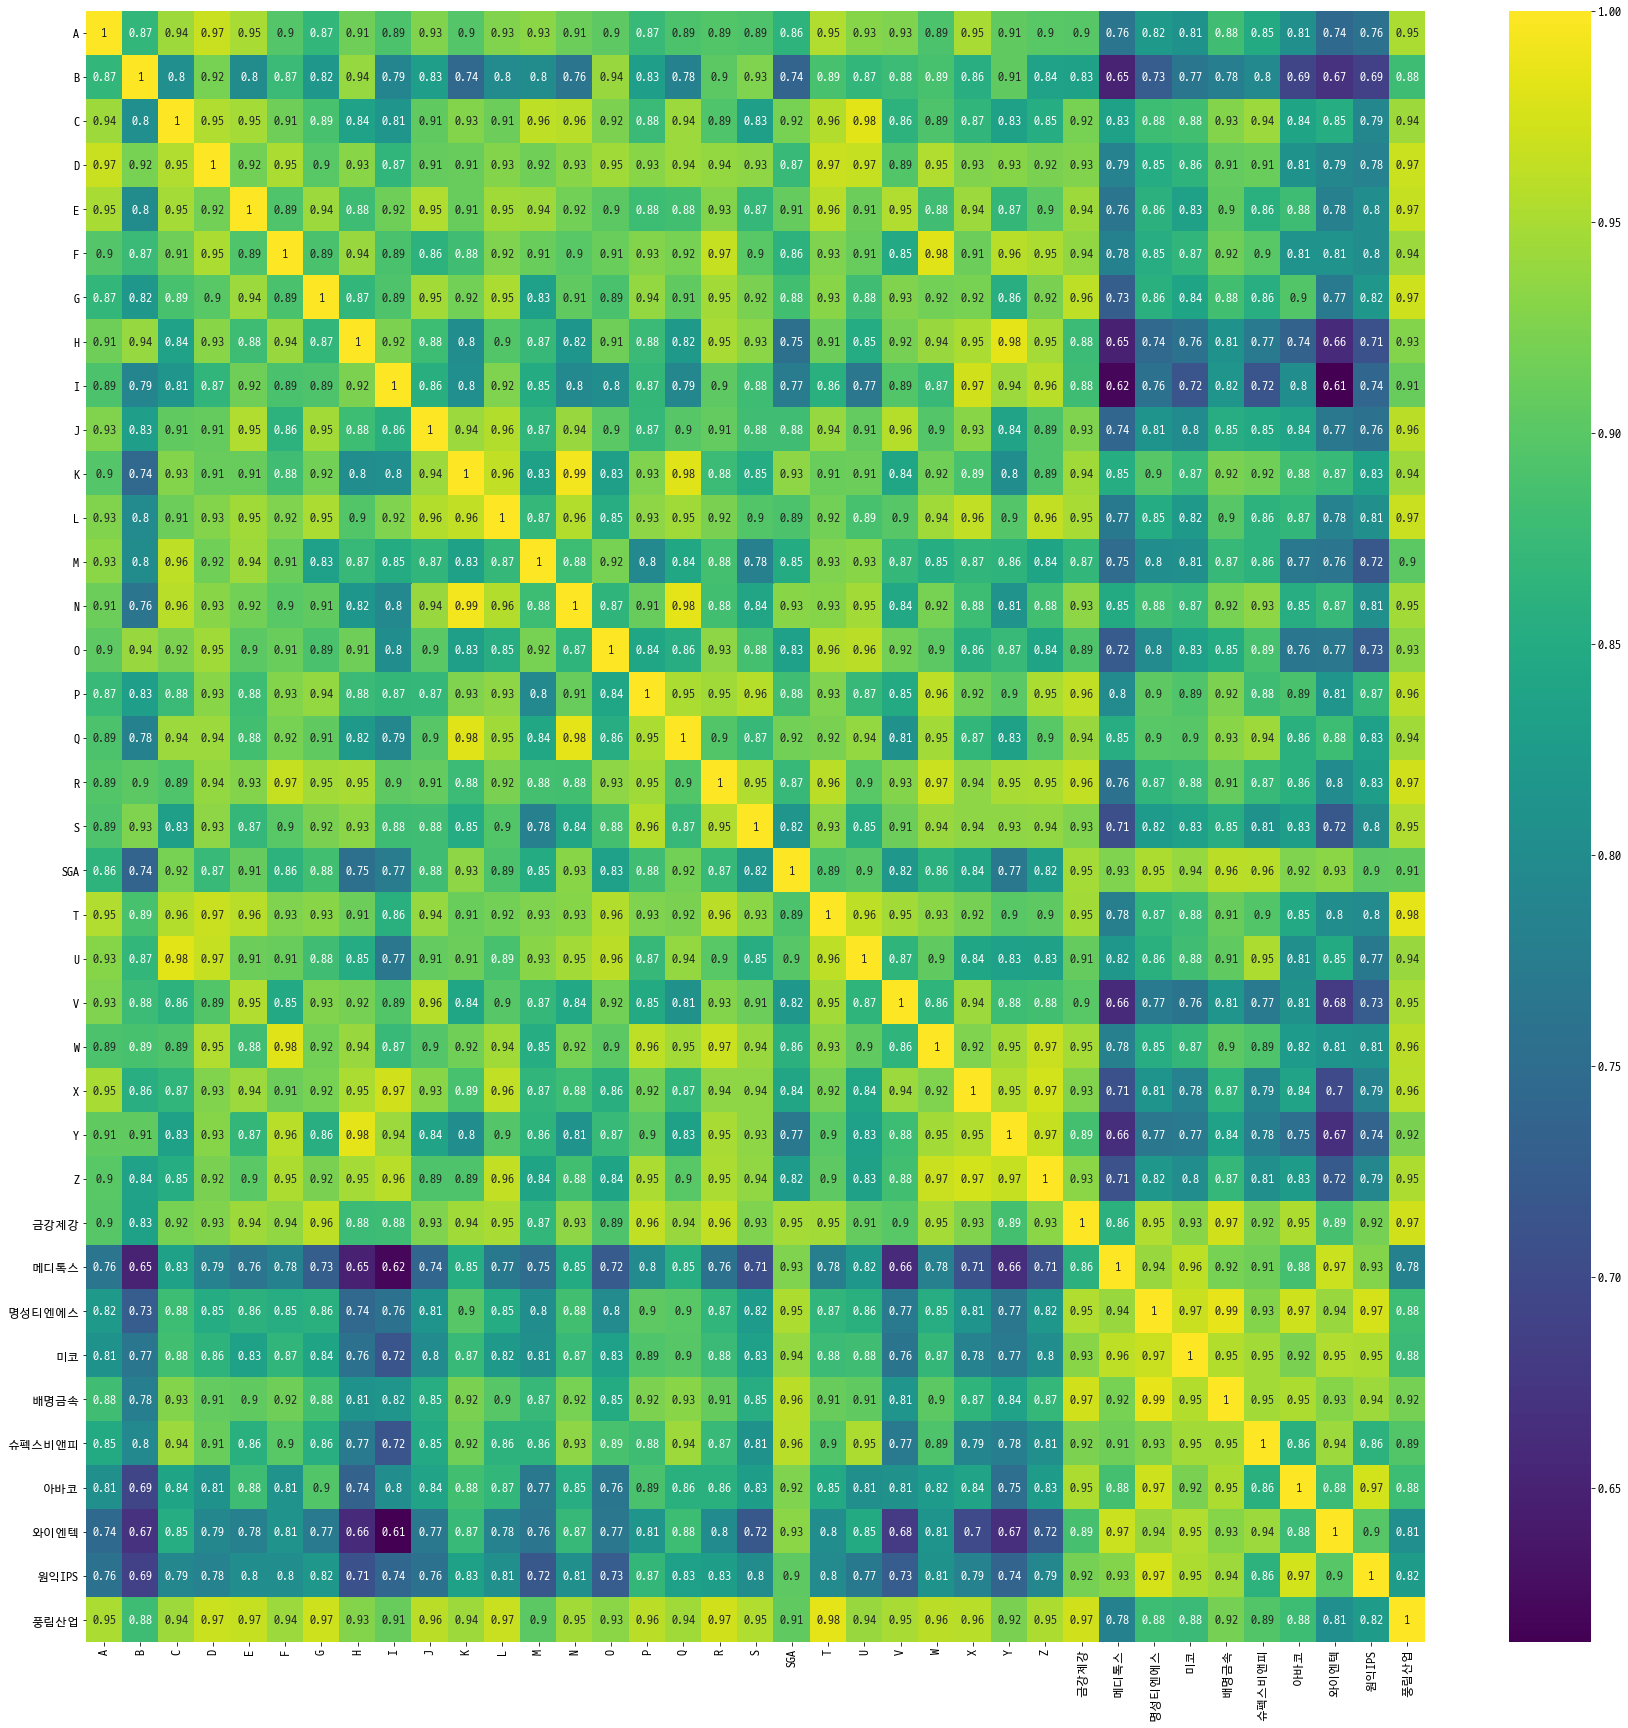

In [354]:
plt.figure(figsize=(30, 30))
sns.heatmap(similarity, xticklabels=result2['company'], yticklabels=result2['company'],cmap='viridis', annot=True)
plt.show()

### K-means Clustering
- result2 = indexing된 원본
- cs = 코사인 유사도

In [52]:
cs = pd.read_csv('data/cosine_similarity.csv')

In [193]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)

In [195]:
# indexing 된 원본 클러스터링
kmeans.fit(result.iloc[:, 1:-1])

KMeans(n_clusters=2, random_state=0)

In [196]:
k_indexing = result

In [197]:
k_indexing['cluster'] = kmeans.labels_
k_indexing_clu = k_indexing.groupby(['target', 'cluster']).count()
k_indexing_clu

자본총계  자산총계  매입채무 및 기타유동채무  매출채권 및 기타유동채권  부채총계  유동부채  유동자산  \
target cluster                                                               
0      0           9     9              9              9     9     9     9   
1      0           2     2              2              2     2     2     2   
       1          27    27             27             27    27    27    27   

                재고자산  매출총이익  법인세비용차감전순이익(손실)  당기순이익(손실)  
target cluster                                           
0      0           9      9                9          9  
1      0           2      2                2          2  
       1          27     27               27         27

In [39]:
a.head()

,A,B,C,D,DMS,E,F,G,H,I,...,금강제강,메디톡스,명성티엔에스,미코,배명금속,슈펙스비앤피,아바코,와이엔텍,원익IPS,풍림산업
,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.766995,0.793635,0.677642,0.918043,0.886182,0.893896,0.729935,0.847838,0.975298,...,0.929404,0.853704,0.884357,0.885616,0.918474,0.930951,0.818325,0.888542,0.771012,0.888695
B,0.766995,1.000000,0.868544,0.939523,0.766985,0.842731,0.903337,0.962442,0.687413,0.850982,...,0.852728,0.670097,0.743174,0.688869,0.794601,0.766327,0.715076,0.624850,0.611983,0.909274
C,0.793635,0.868544,1.000000,0.766233,0.790277,0.838184,0.873246,0.832942,0.821468,0.881706,...,0.863885,0.711059,0.766447,0.708557,0.792615,0.834886,0.758409,0.674842,0.655330,0.906873
D,0.677642,0.939523,0.766233,1.000000,0.700412,0.725815,0.835882,0.969934,0.626769,0.785139,...,0.793746,0.563829,0.672224,0.628596,0.731430,0.730190,0.656598,0.515155,0.538677,0.876177
DMS,0.918043,0.766985,0.790277,0.700412,1.000000,0.876280,0.887384,0.721139,0.893597,0.903791,...,0.967963,0.963797,0.982223,0.980096,0.972302,0.949604,0.959203,0.935789,0.940043,0.897011


In [54]:
kmeans.fit(cs.T)

KMeans(n_clusters=2, random_state=0)

In [55]:
k_cs = cs

In [56]:
k_cs['target'] = result2.target
k_cs['cluster'] = kmeans.labels_

In [58]:
k_cs_clu = k_cs.groupby(['target', 'cluster']).count()
k_cs_clu

A   B   C   D  DMS   E   F   G   H   I  ...  금강제강  메디톡스  \
target cluster                                           ...               
0      0         9   9   9   9    9   9   9   9   9   9  ...     9     9   
1      0        19  19  19  19   19  19  19  19  19  19  ...    19    19   
       1        10  10  10  10   10  10  10  10  10  10  ...    10    10   

                명성티엔에스  미코  배명금속  슈펙스비앤피  아바코  와이엔텍  원익IPS  풍림산업  
target cluster                                                    
0      0             9   9     9       9    9     9      9     9  
1      0            19  19    19      19   19    19     19    19  
       1            10  10    10      10   10    10     10    10  

[3 rows x 38 columns]

### 계산

In [231]:
cal = merge

In [151]:
# cal.drop(['cluster'], axis=1, inplace=True)

In [234]:
cal.head()

,company,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,전기자산총계,...,매출원가,매출총이익,법인세비용차감전순이익(손실),당기순이익(손실),판매비와관리비,target,총자산증가율,매출액증가율,자기자본비율,자산총계순이익률
0,금강제강,6.127969e+10,1.942067e+11,3.911075e+10,4.972530e+10,1.329270e+11,1.139850e+11,1.009693e+11,3.743670e+10,1.794819e+11,...,1.681825e+11,5.919071e+08,-1.350944e+10,-1.126087e+10,7.841895e+09,1,1.082041,0.003519,0.315539,-0.060269
1,금강제강,7.221150e+10,1.794819e+11,4.107451e+10,6.117835e+10,1.072704e+11,8.530256e+10,9.980691e+10,3.334325e+10,1.201414e+11,...,1.220133e+11,1.344448e+10,2.073006e+09,1.519307e+09,9.770100e+09,1,1.493921,0.110189,0.402333,0.010141
2,배명금속,9.529646e+10,2.086196e+11,2.636713e+10,3.016644e+10,1.133231e+11,1.069848e+11,1.205597e+11,6.661848e+10,1.793991e+11,...,7.305672e+10,8.510337e+09,3.762406e+08,6.277812e+08,5.065406e+09,1,1.162880,0.116489,0.456795,0.003236
3,배명금속,7.774548e+10,1.793991e+11,1.853608e+10,2.611897e+10,1.016536e+11,9.504927e+10,9.431595e+10,5.521840e+10,1.711714e+11,...,9.462505e+10,7.700935e+09,-5.482425e+09,-5.245282e+09,9.233610e+09,1,1.048067,0.081384,0.433366,-0.029924
4,풍림산업,1.528374e+11,1.374256e+12,5.168464e+11,7.592653e+11,1.221419e+12,7.529557e+11,9.197183e+11,3.000229e+10,1.188801e+12,...,1.038061e+12,2.072701e+09,-4.136635e+10,-3.585256e+10,4.386715e+10,1,1.156002,0.001997,0.111215,-0.027976


In [248]:
# 계산
cal['총자산증가율'] = cal.자산총계 / cal.전기자산총계
cal['매출액증가율'] = cal.매출총이익 / (cal.매출원가 + cal.매출총이익)
cal['자기자본비율'] = cal.자본총계 / cal.자산총계
cal['자산총계순이익률'] = cal['당기순이익(손실)'] / ( (cal.자산총계 + cal.전기자산총계) / 2)
cal['매출액 법인세 비용 차감 전 순 이익률'] = cal['법인세비용차감전순이익(손실)'] / (cal.매출원가 + cal.매출총이익)
cal['자산총계 법인세 비용 차감 전 순 이익률'] = cal['법인세비용차감전순이익(손실)'] / ((cal.자산총계+cal.전기자산총계) / 2)
cal['매출액 순이익률'] = cal['당기순이익(손실)'] / (cal.매출원가 + cal.매출총이익)
cal['자기자본 순이익률']  = cal['당기순이익(손실)'] / ((cal.자본총계 + cal.전기자본총계) / 2)
cal['재고자산 회전율'] = (cal.매출원가 + cal.매출총이익) / cal.재고자산
cal['자산총계 회전율'] = (cal.매출원가 + cal.매출총이익) / cal.자산총계
cal['매입채무 회전율'] = (cal.매출원가 + cal.매출총이익) / cal['매입채무 및 기타유동채무']
cal['유동비율'] = cal.유동자산 / cal.유동부채
cal['부채비율'] = cal.부채총계 / cal.자본총계

In [246]:
index1 = ['company', '총자산증가율', '매출액증가율', '자기자본비율', '자산총계순이익률', '매출액 법인세 비용 차감 전 순 이익률', '자산총계 법인세 비용 차감 전 순 이익률', '매출액 순이익률', '자기자본 순이익률', '재고자산 회전율', '자산총계 회전율', '매입채무 회전율', '유동비율', '부채비율', 'target']

In [257]:
cal = cal[index1]

In [258]:
cal.iloc[:, -1]

0     1
1     1
2     1
3     1
4     1
     ..
69    0
70    0
71    0
72    0
73    0
Name: target, Length: 74, dtype: int64

In [265]:
# 랜덤포레스트
rf_clf = RandomForestClassifier()

In [309]:
cal.iloc[:, 1:-2]

,총자산증가율,매출액증가율,자기자본비율,자산총계순이익률,매출액 법인세 비용 차감 전 순 이익률,자산총계 법인세 비용 차감 전 순 이익률,매출액 순이익률,자기자본 순이익률,재고자산 회전율,자산총계 회전율,매입채무 회전율,유동비율,부채비율
0,1.082041,0.003507,0.315539,-0.060269,-0.080044,-0.072303,-0.066721,-0.168713,4.508262,0.869045,4.315295,0.885812,2.169185
1,1.493921,0.099252,0.402333,0.010141,0.015304,0.013837,0.011216,0.023840,4.062525,0.754716,3.297855,1.170034,1.485503
2,1.162880,0.104335,0.456795,0.003236,0.004613,0.001939,0.007697,0.007256,1.224391,0.390985,3.093513,1.126886,1.189164
3,1.048067,0.075259,0.433366,-0.029924,-0.053578,-0.031277,-0.051261,-0.065421,1.853114,0.570382,5.520368,0.992285,1.307518
4,1.156002,0.001993,0.111215,-0.027976,-0.039770,-0.032279,-0.034469,-0.212154,34.668480,0.756871,2.012462,1.221477,7.991619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.142112,0.153047,0.560235,0.127899,0.128850,0.157215,0.104823,0.228535,2.280980,1.144230,5.756533,1.907464,0.784966
70,1.161293,0.297147,0.554892,0.081527,0.245162,0.106983,0.186825,0.146610,882.668942,0.406075,29.543954,0.565001,0.802151
71,1.110801,0.231547,0.557455,0.045461,0.158998,0.060871,0.118747,0.080605,787.035880,0.363746,27.564373,0.531585,0.793866
72,1.754989,0.416990,0.630092,0.060733,0.064941,0.061581,0.064047,0.091609,2.077075,0.744295,7.811672,1.690809,0.587071


In [315]:
label = cal.iloc[:, -1]
features = cal.iloc[:, 1:-2]

In [316]:
# cross_val_score , cv -> fold 수
score_list = cross_val_score(rf_clf, features, label, cv=5)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [322]:
a = list(map(lambda x: '{score:.2f}'.format(score=x), score_list))

In [323]:
a

['1.00', '1.00', '1.00', '0.93', '0.50']

In [324]:
# K 평균 클러스터링
kmeans = KMeans(n_clusters=2, max_iter=3000)

In [325]:
# indexing 된 원본 클러스터링
kmeans.fit(cal.iloc[:, 1:-2])

KMeans(max_iter=3000, n_clusters=2)

In [326]:
k_indexing = cal

In [327]:
k_indexing['cluster'] = kmeans.labels_

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [328]:
k_indexing_clu = k_indexing.groupby(['target', 'cluster']).count()

In [329]:
k_indexing_clu

company  총자산증가율  매출액증가율  자기자본비율  자산총계순이익률  \
target cluster                                              
0      0             14      14      14      14        14   
       1              2       2       2       2         2   
1      0             58      58      58      58        58   

                매출액 법인세 비용 차감 전 순 이익률  자산총계 법인세 비용 차감 전 순 이익률  매출액 순이익률  \
target cluster                                                            
0      0                           14                      14        14   
       1                            2                       2         2   
1      0                           58                      58        58   

                자기자본 순이익률  재고자산 회전율  자산총계 회전율  매입채무 회전율  유동비율  부채비율  
target cluster                                                       
0      0               14        14        14        14    14    14  
       1                2         2         2         2     2     2  
1      0               58        58        58        58    58    58